In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [133]:
df = pd.read_csv('lab1_kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


QUESTION 1:

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

QUESTION 2:

In [135]:
df_drop = df.drop(['id','date'],axis=1)
df_drop.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


QUESTION 3:

In [136]:
df_drop['floors'].value_counts().to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


QUESTION 4:

<Axes: xlabel='waterfront', ylabel='price'>

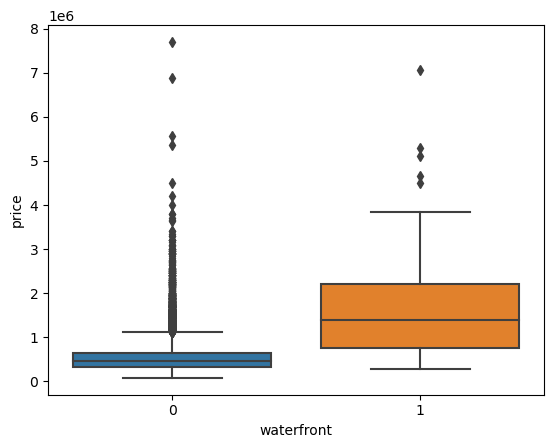

In [137]:
sns.boxplot(y='price',x= 'waterfront',data = df_drop)

<Axes: xlabel='bedrooms', ylabel='price'>

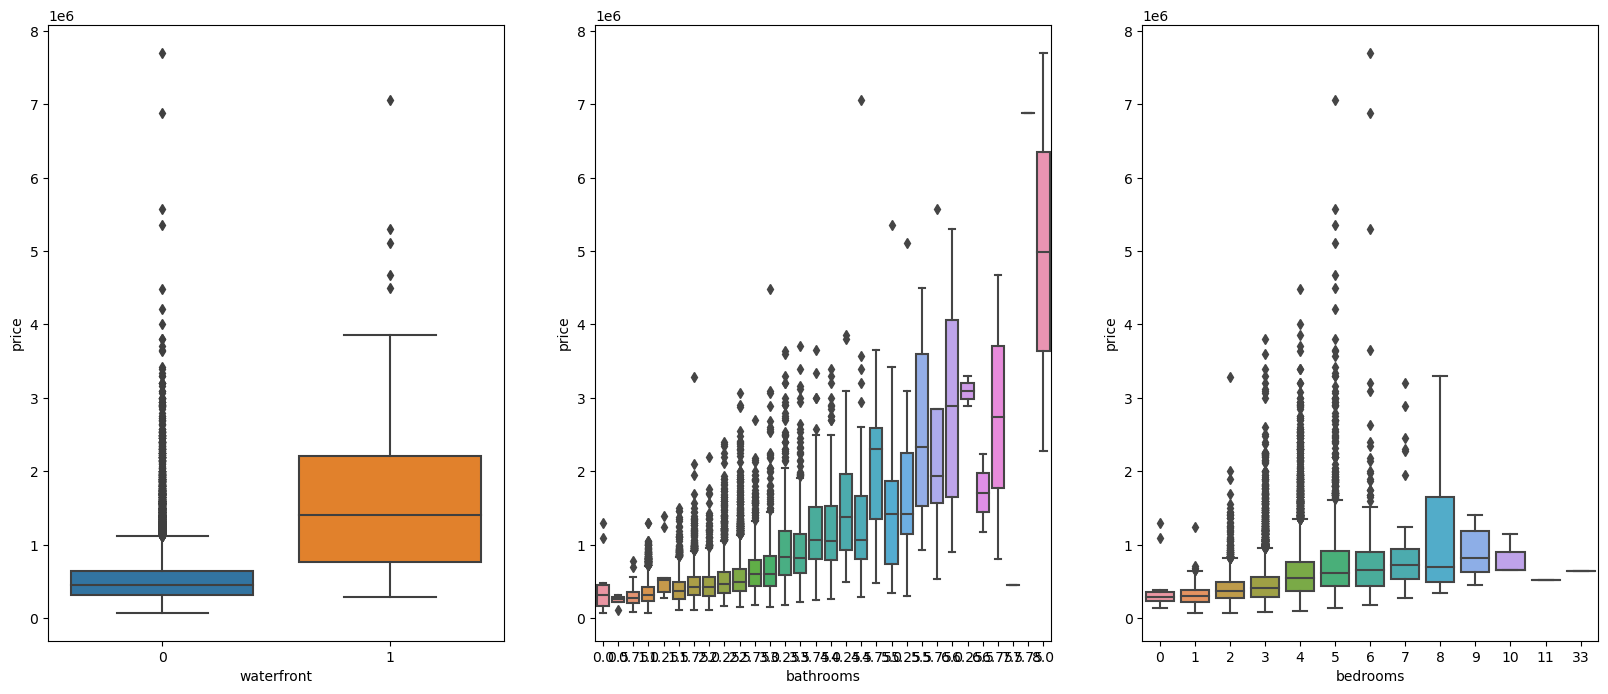

In [138]:
fig, axes = plt.subplots(1,3, figsize=(20,8))

sns.boxplot(ax=axes[0], y= 'price', x='waterfront',data = df_drop)
sns.boxplot(ax=axes[1], y= 'price', x='bathrooms',data = df_drop)
sns.boxplot(ax=axes[2], y= 'price', x='bedrooms',data = df_drop)


In [139]:
# IQR
# Calculate the upper and lower limits
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 3.5*IQR
upper = Q3 + 3.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['bedrooms']>=upper)[0]
lower_array = np.where(df['bedrooms']<=lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


New Shape:  (21589, 21)


<Axes: >

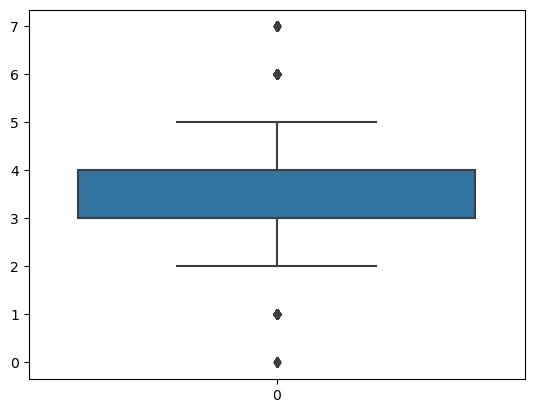

In [140]:
sns.boxplot(df['bedrooms'])


QUESTION 5:

<Axes: xlabel='sqft_above', ylabel='price'>

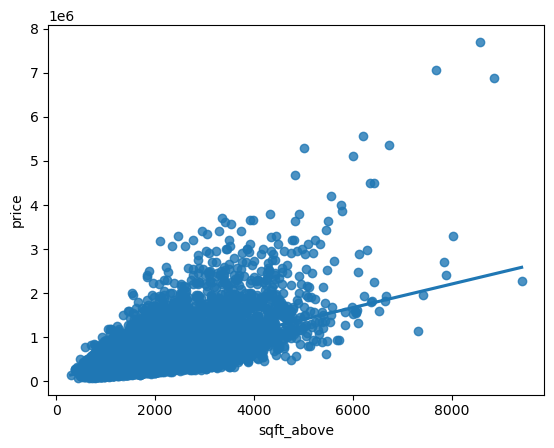

In [141]:
sns.regplot(x="sqft_above", y="price", data=df, ci=None)

In [142]:
df.corr()['price'].sort_values()

/var/folders/r5/crzp6gpx5bq4_8wq2j12nbr40000gn/T/ipykernel_2917/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053284
id              -0.016160
long             0.022252
condition        0.035377
yr_built         0.055714
sqft_lot15       0.082867
sqft_lot         0.090079
yr_renovated     0.126733
floors           0.255858
waterfront       0.267206
lat              0.307159
bedrooms         0.315028
sqft_basement    0.322675
view             0.398050
bathrooms        0.525192
sqft_living15    0.585064
sqft_above       0.604930
grade            0.667528
sqft_living      0.701431
price            1.000000
Name: price, dtype: float64

In [143]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.49200543892391424

QUESTION 7:

In [144]:
feature = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
df_x = df[feature] 
df_y = df['price']
lm = LinearRegression()
lm.fit(df_x,df_y)
lm.score(df_x,df_y)

0.6581843069966854

In [145]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[feature],df['price'])
pipe.score(df[feature],df['price'])

0.7511740297622116

QUESTION 10,11:

In [146]:
from sklearn.model_selection import train_test_split
features = ["floors", "waterfront","lat" ,"bedrooms" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']
x_train, x_test,y_train, y_test= train_test_split(X,Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3239
number of training samples: 18350


In [147]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.6661523954589088

In [148]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])

RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

/Users/kiemle/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.44202e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.7438843703698359

In [149]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest.score(x_test,y_test)

0.823398390732524